<a href="https://colab.research.google.com/github/alexn15naumov/-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/drive/MyDrive/documents_Sivilio.csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/documents_Sivilio.csv')
print(df.shape)
df.info()

(4647, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    0 non-null      float64
 1   email   0 non-null      float64
 2   phone   0 non-null      float64
 3   name.1  4646 non-null   object 
 4   skill   3767 non-null   object 
 5   major   4419 non-null   object 
 6   file    4647 non-null   object 
dtypes: float64(3), object(4)
memory usage: 254.3+ KB


In [ ]:
df.tail(10)

,name,email,phone,name.1,skill,major,file
4637,NaN,NaN,NaN,Lead,React,"Nodejs,React",https://admin.sivilio.by/api/core/files/downlo...
4638,NaN,NaN,NaN,Senior,Go/Golang,"python,Go/Golang",https://admin.sivilio.by/api/core/files/downlo...
4639,NaN,NaN,NaN,Lead,python,python,https://admin.sivilio.by/api/core/files/downlo...
4640,NaN,NaN,NaN,Lead,python,python,https://admin.sivilio.by/api/core/files/downlo...
4641,NaN,NaN,NaN,Senior,python,python,https://admin.sivilio.by/api/core/files/downlo...
4642,NaN,NaN,NaN,Lead,python,python,https://admin.sivilio.by/api/core/files/downlo...
4643,NaN,NaN,NaN,Middle,Go/Golang,Go/Golang,https://admin.sivilio.by/api/core/files/downlo...
4644,NaN,NaN,NaN,Lead,Javascript,"Javascript,React",https://admin.sivilio.by/api/core/files/downlo...
4645,NaN,NaN,NaN,Lead,Javascript,"Nodejs,React",https://admin.sivilio.by/api/core/files/downlo...
4646,NaN,NaN,NaN,Middle,Java,"Java,Spring Framework",https://admin.sivilio.by/api/core/files/downlo...


In [ ]:
df = df[['name.1', 'skill', 'major']]


df.tail()

,name.1,skill,major
4642,Lead,python,python
4643,Middle,Go/Golang,Go/Golang
4644,Lead,Javascript,"Javascript,React"
4645,Lead,Javascript,"Nodejs,React"
4646,Middle,Java,"Java,Spring Framework"


In [ ]:
df['name.1'].unique()

array(['Middle', 'Senior', 'Lead', nan, 'Head of', 'Architector',
       'Junior', 'Не указан'], dtype=object)

In [ ]:
# Подсчет количества строк с пропущенными значениями в столбце 'skill'
missing_skills_count = df['skill'].isnull().sum()

print(f"Количество строк с пропущенными значениями в столбце 'skill': {missing_skills_count}")


Количество строк с пропущенными значениями в столбце 'skill': 880


In [ ]:
df.rename(columns={'name.1': 'name'}, inplace=True)

In [ ]:
# Подсчет количества строк с пропущенными значениями в столбце 'skill'
missing_names_count = df['name'].isnull().sum()

print(f"Количество строк с пропущенными значениями в столбце 'name': {missing_names_count}")


Количество строк с пропущенными значениями в столбце 'name': 1


In [ ]:


# Подсчет количества NaN в столбце 'name'
nan_count = df['name'].isnull().sum()

# Подсчет количества строк со значением 'Не указано' в столбце 'name'
not_specified_count = df['name'].eq('Не указано').sum()

print(f"Количество строк с NaN в столбце 'name': {nan_count}")
print(f"Количество строк с 'Не указано' в столбце 'name': {not_specified_count}")


Количество строк с NaN в столбце 'name': 1
Количество строк с 'Не указано' в столбце 'name': 0


In [ ]:
# Вывод строк, где в столбце 'name' присутствуют NaN
rows_with_nan = df[df['name'].isnull()]

# Вывод строк, где в столбце 'name' указано 'Не указано'
rows_with_not_specified = df[df['name'] == 'Не указано']

print("Строки с NaN в столбце 'name':")
print(rows_with_nan)

print("\nСтроки с 'Не указано' в столбце 'name':")
print(rows_with_not_specified)


Строки с NaN в столбце 'name':
   name skill    major
22  NaN   NaN  Magento

Строки с 'Не указано' в столбце 'name':
Empty DataFrame
Columns: [name, skill, major]
Index: []


In [ ]:
# Создание нового столбца для классификации
df['name_status'] = df['name'].apply(lambda x: 'NaN' if pd.isnull(x) else ('Не указано' if x == 'Не указано' else 'Заполнено'))

# Группировка данных по новому столбцу и подсчет количества в каждой группе
grouped_data = df.groupby('name_status').size()

print("Группировка по статусу столбца 'name':")
print(grouped_data)


Группировка по статусу столбца 'name':
name_status
NaN             1
Заполнено    4646
dtype: int64


In [ ]:
# Подсчет количества NaN
nan_count = df['name'].isnull().sum()

# Подсчет количества строк со значением 'Не указан'
not_specified_count = df['name'].eq('Не указан').sum()

print(f"Количество строк с NaN в столбце 'name': {nan_count}")
print(f"Количество строк с 'Не указан' в столбце 'name': {not_specified_count}")


Количество строк с NaN в столбце 'name': 1
Количество строк с 'Не указан' в столбце 'name': 1


In [ ]:
# Удаление строки с NaN, если это решение принято
df.dropna(subset=['name'], inplace=True)

# Замена 'Не указан' на наиболее часто встречающееся значение
# Сначала найдем наиболее часто встречающееся значение (без учета 'Не указан' и NaN)
most_frequent = df[df['name'] != 'Не указан']['name'].mode()[0]

# Замена 'Не указан' на наиболее часто встречающееся значение
df['name'].replace('Не указан', most_frequent, inplace=True)

# Проверка изменений
print(df['name'].value_counts())


name
Senior         1992
Middle         1872
Junior          377
Lead            326
Head of          66
Architector      13
Name: count, dtype: int64


In [ ]:
df_rec = pd.read_csv('/content/drive/MyDrive/records - records.csv')
print(df_rec.shape)
df_rec.info()

(436, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    436 non-null    object
 1   name.1  436 non-null    object
 2   name.2  436 non-null    object
dtypes: object(3)
memory usage: 10.3+ KB


In [ ]:
df_rec.head(5)

,name,name.1,name.2
0,С++ Think-Cell,Русович Юрий,Тестовое задание
1,React Native Developer,Лилия Кушнарева,Тестовое задание
2,Back End Developer - RND,Фабер Джулиан,Пауза
3,marketing+smm+content,Столяр Дарья,Отмена вакансии
4,С/С++ (CATIA) developer,Фокин Владислав,Отмена вакансии


In [ ]:
df_rec['name.2'].value_counts()

name.2
Отмена вакансии     433
Тестовое задание      2
Пауза                 1
Name: count, dtype: int64

# с учетом обновлений

In [1]:
import pandas as pd

# Загрузка данных
documents_df = pd.read_csv('/content/drive/MyDrive/documents_Sivilio.csv')
records_df = pd.read_csv('/content/drive/MyDrive/records - records.csv')

# Очистка данных: удаление пустых строк, если они не несут значимой информации
documents_df = documents_df.dropna(subset=['name.1', 'skill'])

# Подготовка колонок (переименование для удобства)
documents_df.rename(columns={'name.1': 'level', 'skill': 'skills'}, inplace=True)
records_df.rename(columns={'name': 'position', 'name.1': 'candidate_name', 'name.2': 'status'}, inplace=True)

print(documents_df.head())
print(records_df.head())


   name  email  phone   level                    skills  \
1   NaN    NaN    NaN  Middle             Java,Selenium   
4   NaN    NaN    NaN  Middle  Scrum,Product Management   
5   NaN    NaN    NaN  Senior            Mobile testing   
6   NaN    NaN    NaN  Middle            Mobile testing   
8   NaN    NaN    NaN  Senior                 Magento 2   

                                        major  \
1                              Java,Ruby,Jira   
4                    Scrum,Product Management   
5  MySQL,Swift,Android,iOS,Git,Mobile testing   
6                  Android,iOS,Mobile testing   
8                            Java,PHP,Magento   

                                                file  
1  https://admin.sivilio.by/api/core/files/downlo...  
4  https://admin.sivilio.by/api/core/files/downlo...  
5  https://admin.sivilio.by/api/core/files/downlo...  
6  https://admin.sivilio.by/api/core/files/downlo...  
8  https://admin.sivilio.by/api/core/files/downlo...  
                   p

<ipython-input-1-52073821802f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents_df.rename(columns={'name.1': 'level', 'skill': 'skills'}, inplace=True)


In [2]:
def filter_by_level(df, level):
    return df[df['level'].str.contains(level, case=False)]


In [3]:
def filter_by_skills(df, required_skills):
    # Предполагаем, что навыки в датафрейме перечислены через запятую
    return df[df['skills'].apply(lambda x: all(skill in x.split(',') for skill in required_skills))]


In [4]:
import pandas as pd

# Загрузка данных
documents_df = pd.read_csv('/content/drive/MyDrive/documents_Sivilio.csv')
records_df = pd.read_csv('/content/drive/MyDrive/records - records.csv')

# Переименовываем колонки для удобства, делаем это до фильтрации
documents_df.rename(columns={'name.1': 'level', 'skill': 'skills'}, inplace=True)
records_df.rename(columns={'name': 'position', 'name.1': 'candidate_name', 'name.2': 'status'}, inplace=True)

# Очистка данных: удаление пустых строк, если они не несут значимой информации
# Используем .copy() чтобы избежать SettingWithCopyWarning
clean_documents_df = documents_df.dropna(subset=['level', 'skills']).copy()

print(clean_documents_df.head())
print(records_df.head())


   name  email  phone   level                    skills  \
1   NaN    NaN    NaN  Middle             Java,Selenium   
4   NaN    NaN    NaN  Middle  Scrum,Product Management   
5   NaN    NaN    NaN  Senior            Mobile testing   
6   NaN    NaN    NaN  Middle            Mobile testing   
8   NaN    NaN    NaN  Senior                 Magento 2   

                                        major  \
1                              Java,Ruby,Jira   
4                    Scrum,Product Management   
5  MySQL,Swift,Android,iOS,Git,Mobile testing   
6                  Android,iOS,Mobile testing   
8                            Java,PHP,Magento   

                                                file  
1  https://admin.sivilio.by/api/core/files/downlo...  
4  https://admin.sivilio.by/api/core/files/downlo...  
5  https://admin.sivilio.by/api/core/files/downlo...  
6  https://admin.sivilio.by/api/core/files/downlo...  
8  https://admin.sivilio.by/api/core/files/downlo...  
                   p

In [5]:
def filter_by_level(df, level):
    return df[df['level'].str.contains(level, case=False)]

def filter_by_skills(df, required_skills):
    # Предполагаем, что навыки в датафрейме перечислены через запятую
    return df[df['skills'].apply(lambda x: all(skill.lower() in x.lower().split(',') for skill in required_skills))]

# Пример фильтрации по уровню и навыкам
filtered_by_level = filter_by_level(clean_documents_df, 'Middle')
filtered_by_skills = filter_by_skills(clean_documents_df, ['Java', 'Selenium'])

print(filtered_by_level)
print(filtered_by_skills)


      name  email  phone   level                    skills  \
1      NaN    NaN    NaN  Middle             Java,Selenium   
4      NaN    NaN    NaN  Middle  Scrum,Product Management   
6      NaN    NaN    NaN  Middle            Mobile testing   
20     NaN    NaN    NaN  Middle                   Magento   
25     NaN    NaN    NaN  Middle                       PHP   
...    ...    ...    ...     ...                       ...   
4610   NaN    NaN    NaN  Middle                       C++   
4615   NaN    NaN    NaN  Middle      Nodejs,Angular,React   
4624   NaN    NaN    NaN  Middle                       PHP   
4643   NaN    NaN    NaN  Middle                 Go/Golang   
4646   NaN    NaN    NaN  Middle                      Java   

                                                  major  \
1                                        Java,Ruby,Jira   
4                              Scrum,Product Management   
6                            Android,iOS,Mobile testing   
20                 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

documents_df = pd.read_csv('/content/drive/MyDrive/documents_Sivilio.csv')
documents_df.rename(columns={'name.1': 'level', 'skill': 'skills'}, inplace=True)
documents_df.dropna(subset=['level', 'skills'], inplace=True)

level_counts = documents_df['level'].value_counts()

skill_series = documents_df['skills'].str.split(',').explode()
top_skills = skill_series.value_counts().head(10)


<ipython-input-8-a34dec625860>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.index, y=level_counts.values, palette='viridis')


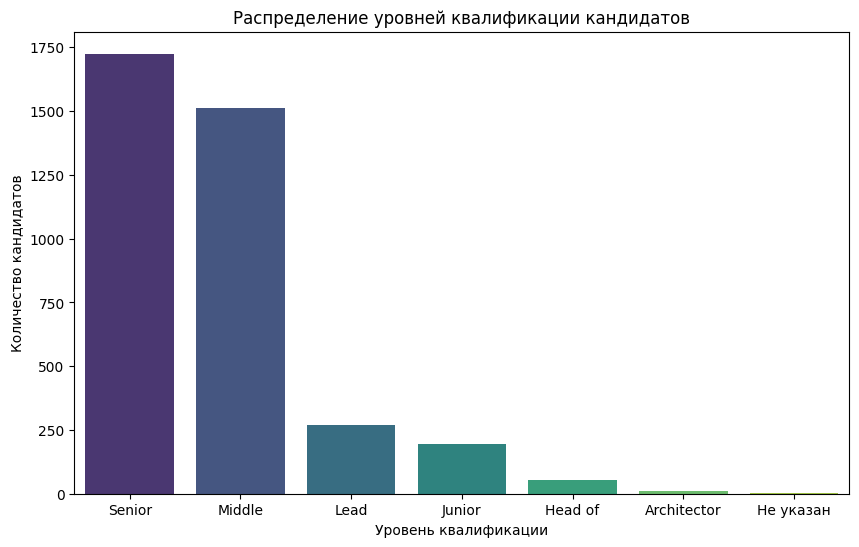

<ipython-input-8-a34dec625860>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='rocket')


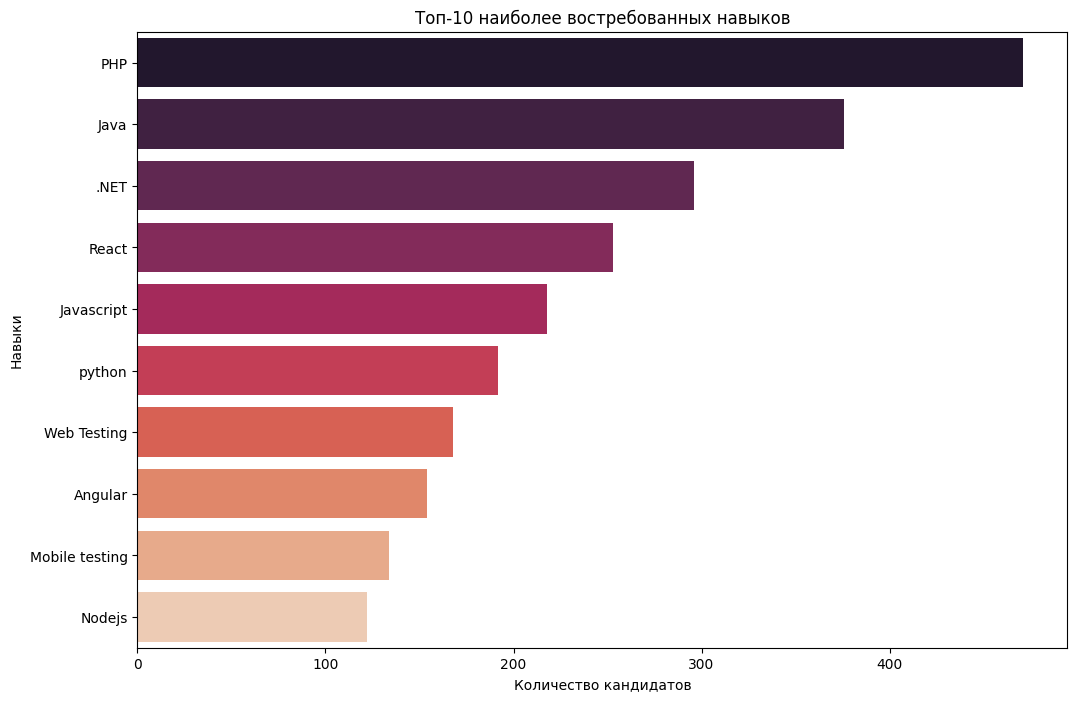

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=level_counts.index, y=level_counts.values, palette='viridis')
plt.title('Распределение уровней квалификации кандидатов')
plt.xlabel('Уровень квалификации')
plt.ylabel('Количество кандидатов')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='rocket')
plt.title('Топ-10 наиболее востребованных навыков')
plt.xlabel('Количество кандидатов')
plt.ylabel('Навыки')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Загрузка данных
documents_df = pd.read_csv('/content/drive/MyDrive/documents_Sivilio.csv')
records_df = pd.read_csv('/content/drive/MyDrive/records - records.csv')

# Предполагаем, что в documents_df уже переименованы столбцы для удобства
# documents_df.rename(columns={'name.1': 'level', 'skill': 'skills'}, inplace=True)

# Заполнение пропущенных значений (или можно удалить эти строки, если они не критичны)
documents_df.fillna('', inplace=True)

# Кодирование категориальных переменных
# Для уровня квалификации
le = LabelEncoder()
documents_df['level_encoded'] = le.fit_transform(documents_df['level'])

# Для навыков мы можем использовать OneHotEncoder или другие стратегии в зависимости от размера данных
# Так как навыки представлены списком, их нужно сначала преобразовать в формат, который можно закодировать
skills_series = documents_df['skills'].str.split(',').explode().unique()
skills_encoded = pd.get_dummies(skills_series, prefix='skill').max(level=0)

# Объединение закодированных навыков обратно с основным DataFrame
documents_df = documents_df.join(skills_encoded, on='skills', how='left')

# Разбиение данных на обучающий и тестовый наборы
X = documents_df.drop(['level', 'skills', 'major', 'file'], axis=1) # Здесь нужно включить только признаки для модели
y = documents_df['level_encoded'] # Или другой целевой признак, если он у нас есть

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных (если есть числовые признаки)
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


KeyError: 'level'